### Importing the Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### Importing & Merging the Data Sets

In [2]:
claims = pd.read_csv('claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
cust_info = pd.read_csv('cust_demographics.csv')
cust_info

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
Cust_data = pd.merge(cust_info,claims, how = 'inner',left_on = 'CUST_ID',right_on = 'customer_id')
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [5]:
Cust_data.to_csv("Merged.csv")

### Performing the Exploratory Data Analysis on the given data

In [6]:
#Understanding the data
print(Cust_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [7]:
#Renaming the Variables & converting them into Specific DataType
Cust_data['claim_amount']= Cust_data['claim_amount'].str.replace('$',' ')
Cust_data['claim_amount'] = pd.to_numeric(Cust_data['claim_amount'])
Cust_data['DateOfBirth'] = pd.to_datetime(Cust_data['DateOfBirth'])
Cust_data.dtypes

C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_5372\3816267325.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Cust_data['DateOfBirth'] = pd.to_datetime(Cust_data['DateOfBirth'])


CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [8]:
#Handling missing values:
print(Cust_data.isnull().sum())

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64


In [9]:
mode_values = Cust_data.mode().iloc[0]
Cust_data_filled = Cust_data.fillna(mode_values,inplace = True)
print(Cust_data.isnull().sum())

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64


In [10]:
#Checking for Duplicates:
print(Cust_data.duplicated().sum())

0


In [11]:
#Summary statistics
print(Cust_data.describe())

            CUST_ID                    DateOfBirth      claim_id  \
count  1.085000e+03                           1085  1.085000e+03   
mean   5.076790e+07  2015-03-16 02:23:20.184332032  4.891553e+07   
min    1.545570e+05            1974-02-14 00:00:00  2.683200e+04   
25%    2.645062e+07            1984-06-20 00:00:00  2.404606e+07   
50%    4.975949e+07            1994-07-17 00:00:00  4.855975e+07   
75%    7.609396e+07            2064-04-07 00:00:00  7.404400e+07   
max    9.996199e+07            2073-11-30 00:00:00  9.977548e+07   
std    2.849625e+07                            NaN  2.912818e+07   

        customer_id  claim_amount  total_policy_claims  
count  1.085000e+03   1085.000000          1085.000000  
mean   5.076790e+07  11818.419355             1.581567  
min    1.545570e+05   1000.000000             1.000000  
25%    2.645062e+07   1700.000000             1.000000  
50%    4.975949e+07   2620.000000             1.000000  
75%    7.609396e+07  22850.000000            

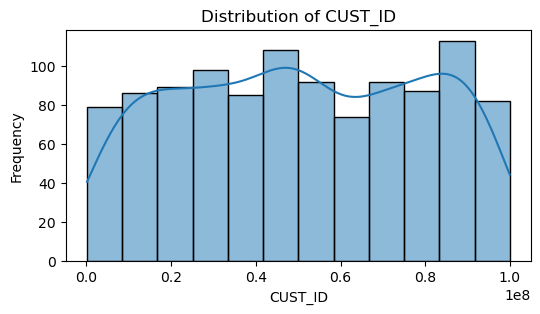

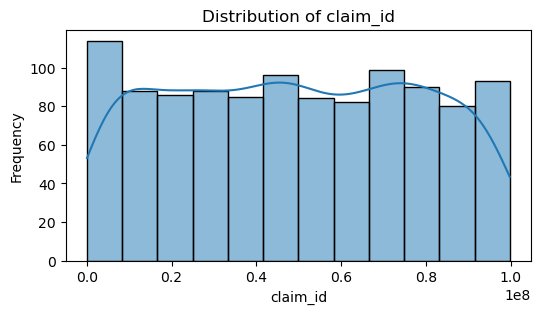

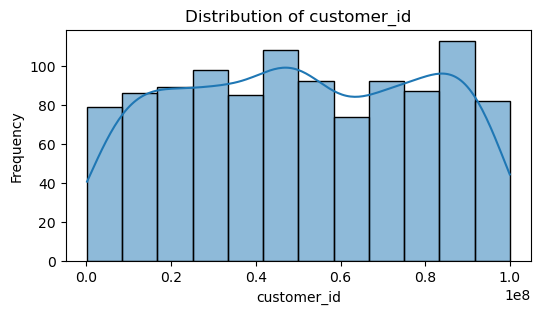

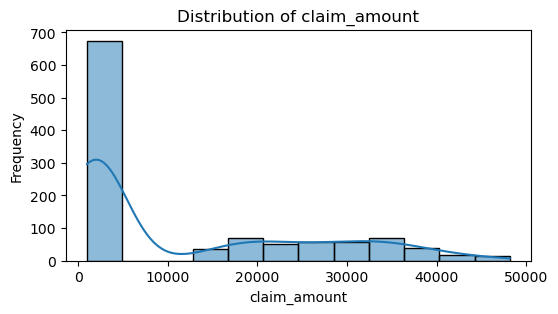

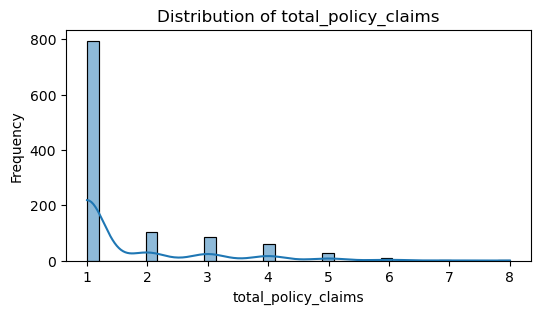

In [12]:
#Distribution of numerical variables:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = Cust_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(Cust_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

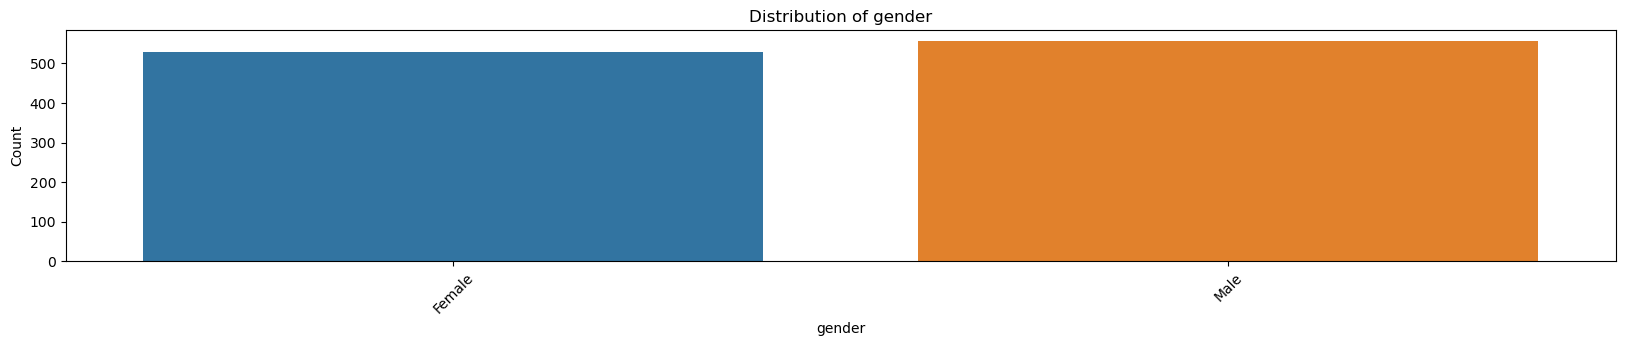

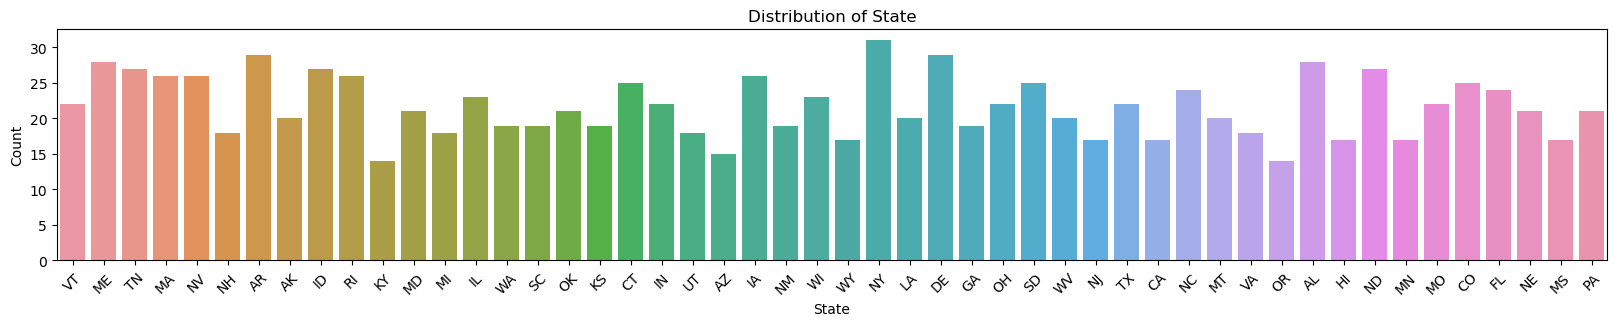

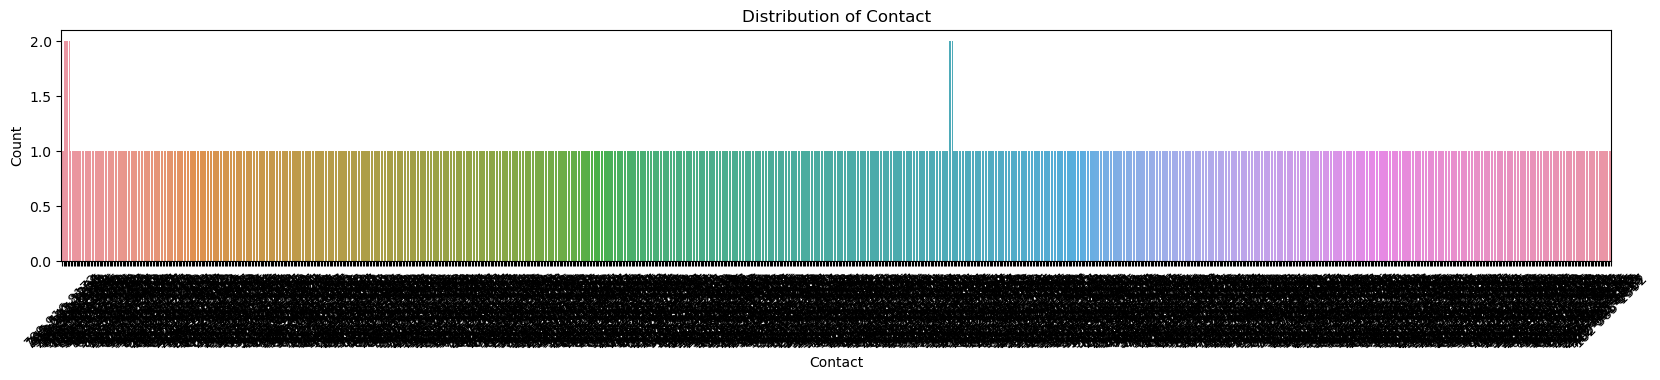

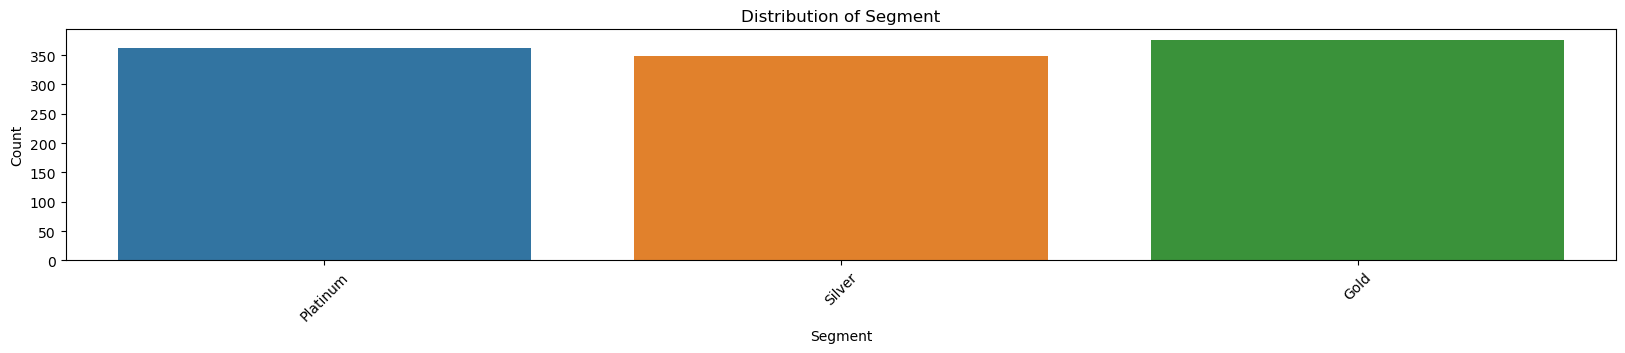

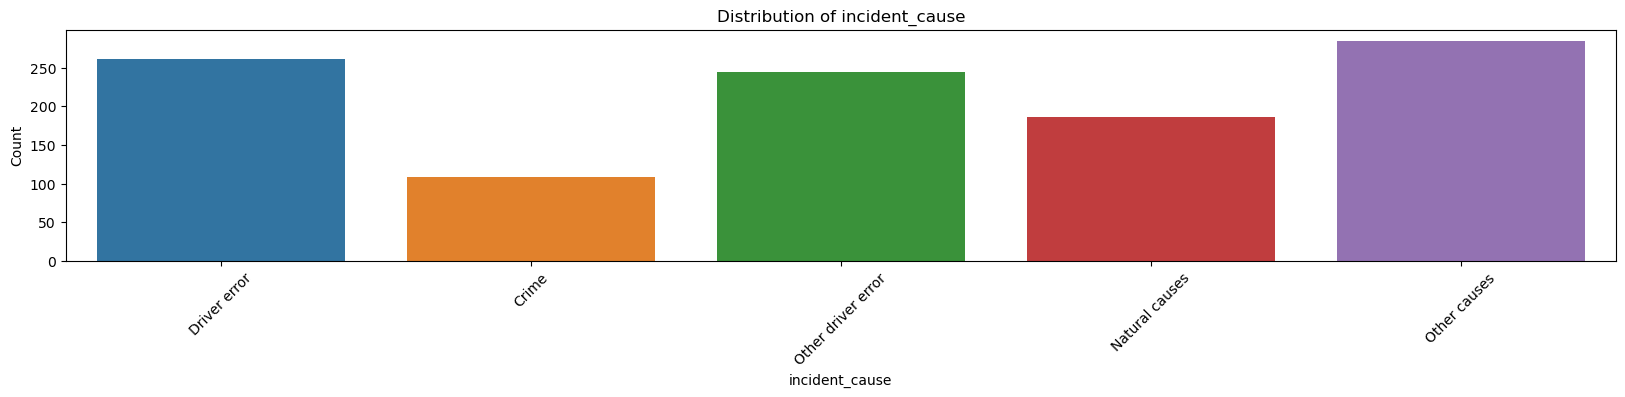

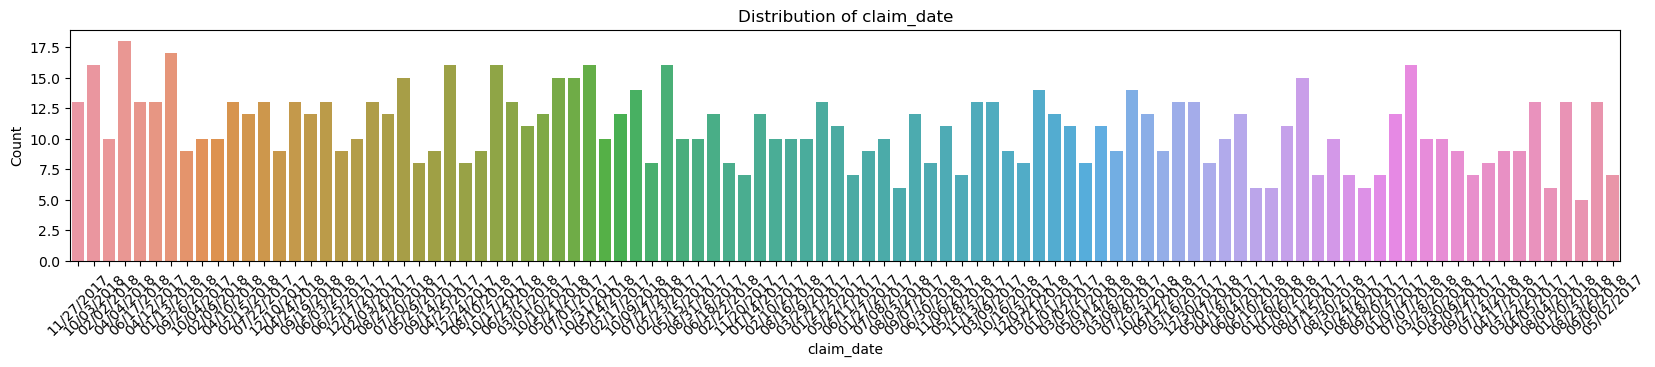

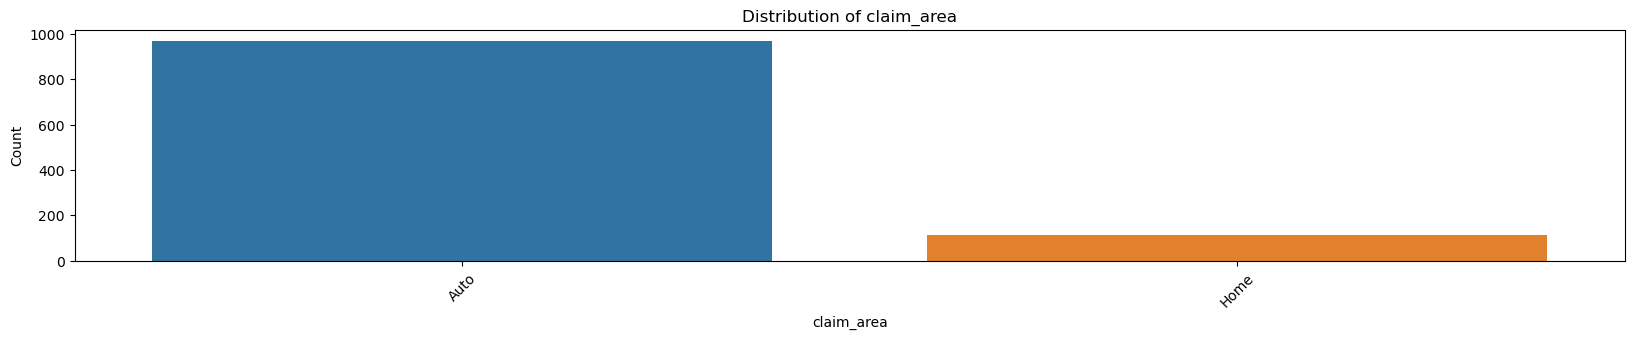

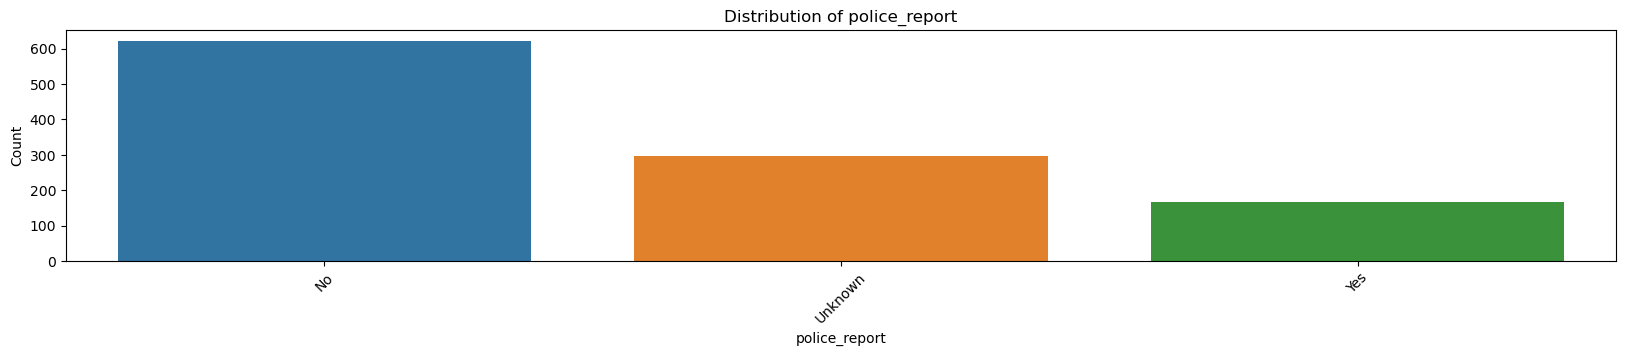

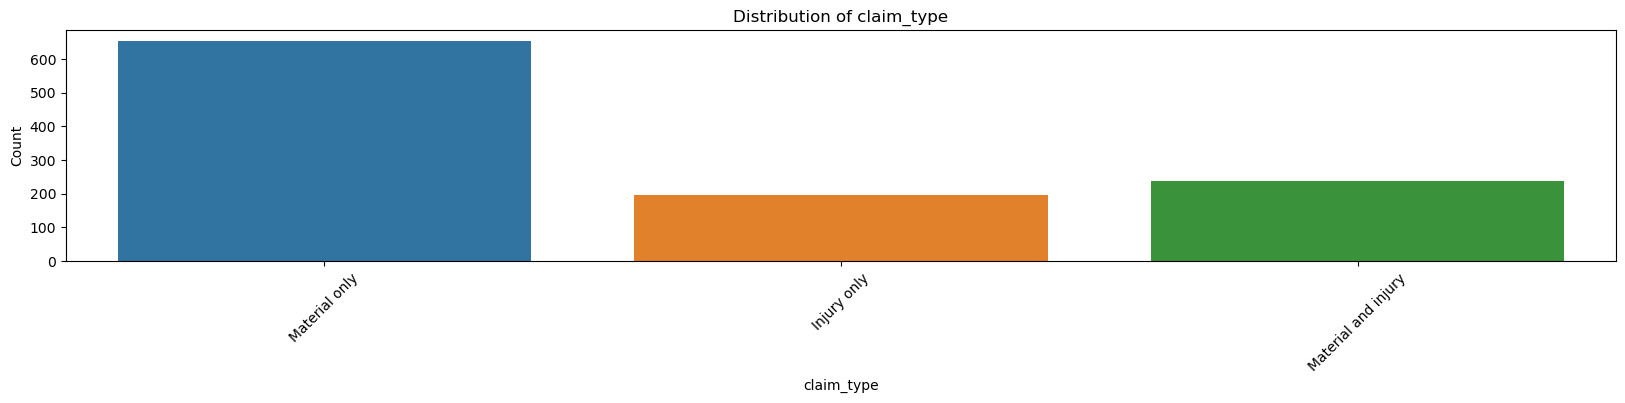

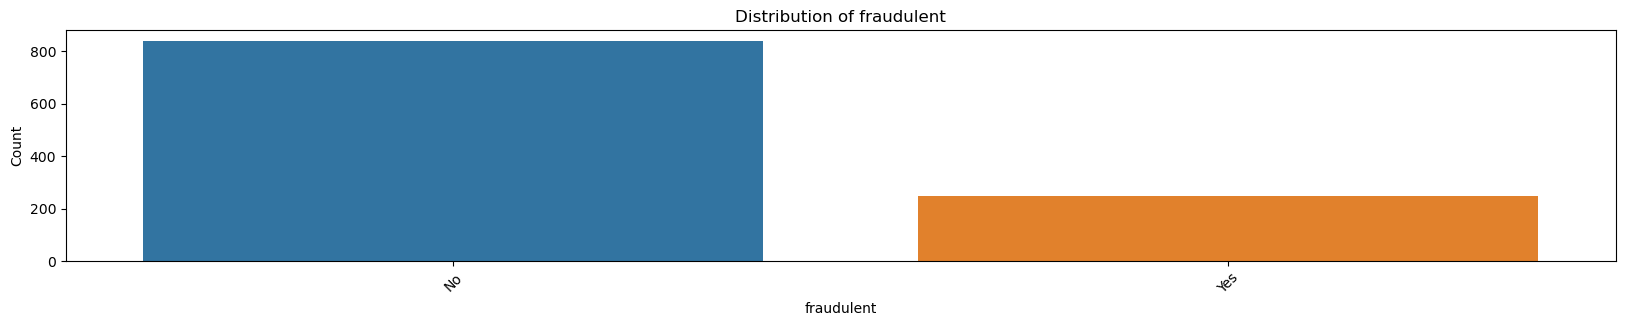

In [13]:
#Distribution of categorical variables:
categorical_cols = Cust_data.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(20, 3))
    sns.countplot(data=Cust_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
df = pd.DataFrame(Cust_data)
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No


In [15]:
#Encoding the Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = Cust_data.select_dtypes(include='object')

for col in categorical_columns:
    Cust_data[col] = le.fit_transform(Cust_data[col])
                                                     

In [16]:
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,0,1979-01-12,45,815,1,54004764,21868593,1,94,0,0,2,2980.0,1.0,0
1,75740424,0,2070-01-13,20,186,2,33985796,75740424,0,81,1,1,2,2980.0,3.0,0
2,30308357,0,1984-03-11,41,829,2,53522022,30308357,4,9,0,0,2,3369.5,1.0,1
3,30308357,0,1984-03-11,41,829,2,63017412,30308357,1,27,0,0,2,1950.0,6.0,0
4,47830476,0,1986-05-01,18,349,2,13015401,47830476,2,49,0,0,2,1680.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,0,1981-03-15,27,402,1,62020796,79539873,4,73,0,2,2,1770.0,1.0,0
1081,42364152,0,1996-07-07,12,482,2,63269067,42364152,3,38,1,0,2,2800.0,1.0,0
1082,19888166,1,1990-04-11,47,708,0,22690595,19888166,4,40,0,2,0,33080.0,2.0,0
1083,11256802,0,2064-10-22,17,413,2,12376894,11256802,4,32,0,0,2,2840.0,4.0,0


In [17]:
Cust_data.to_csv("Capstone Project_fraudulent.csv")

In [18]:
#Outlier detection:
Cust_data[numerical_cols].columns

Index(['CUST_ID', 'claim_id', 'customer_id', 'claim_amount',
       'total_policy_claims'],
      dtype='object')

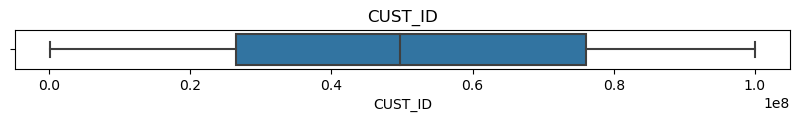

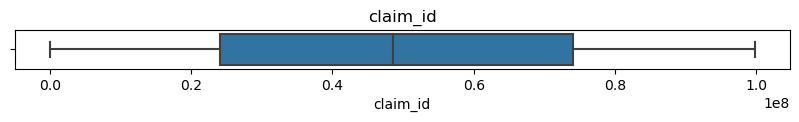

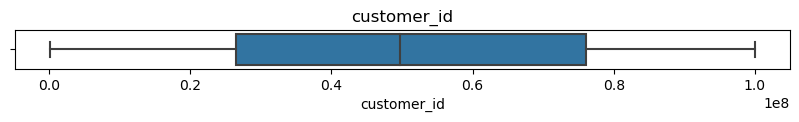

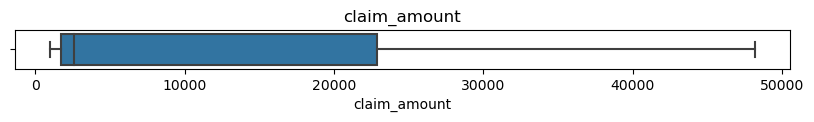

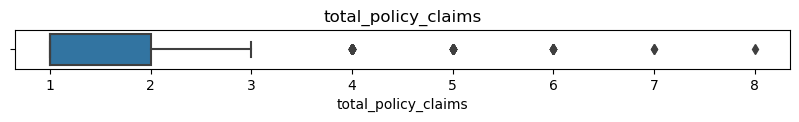

In [19]:
clmn=['CUST_ID', 'claim_id', 'customer_id', 'claim_amount','total_policy_claims']
for i in clmn:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=Cust_data[i])
    plt.title(i)
    plt.show()

In [20]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [21]:
Cust_data.apply(outliertreat_IQR)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,-48014387.5,-1.5,1864-10-08,-28.0,-537.5,-3.0,-50950840.5,-48014387.5,-2.0,-53.5,0.0,-1.5,-0.5,-30025.0,-0.5,0.0
1,150558968.5,2.5,2183-12-19,76.0,1618.5,5.0,149040899.5,150558968.5,6.0,150.5,0.0,2.5,3.5,54575.0,3.5,0.0


In [22]:
#Removing the Outliers
Cust_data['total_policy_claims'] = Cust_data.total_policy_claims.clip(lower = -0.5, upper = 3.5)

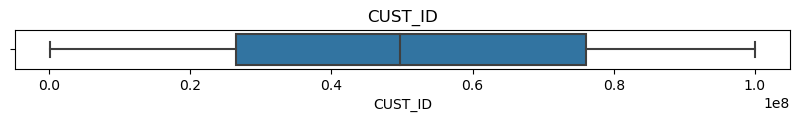

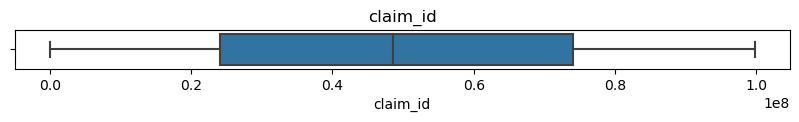

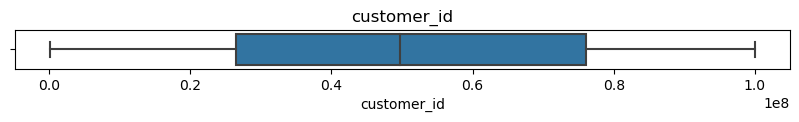

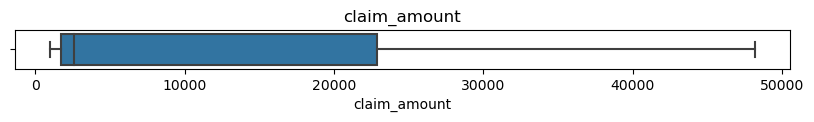

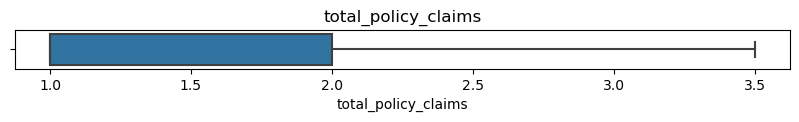

In [23]:
clmn=['CUST_ID', 'claim_id', 'customer_id', 'claim_amount','total_policy_claims']
for i in clmn:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=Cust_data[i])
    plt.title(i)
    plt.show()

### Feature Engineering

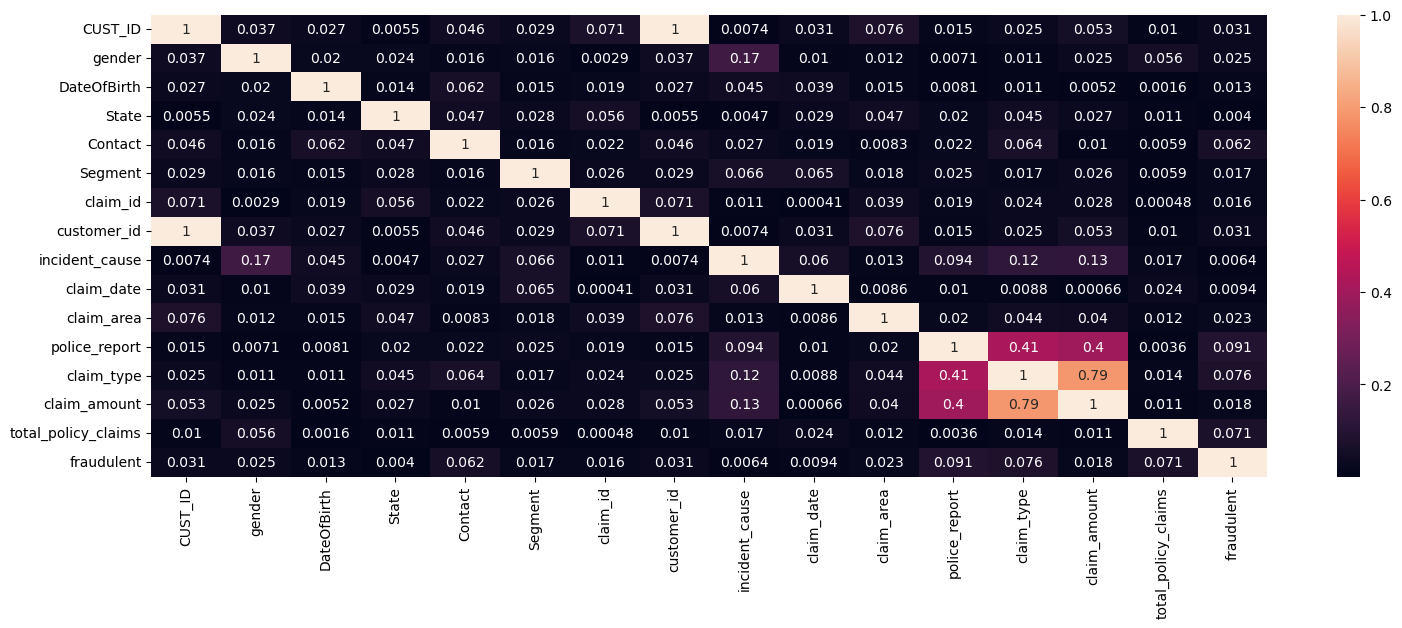

In [24]:
#finding the Correlation with the Target Variable
plt.figure(figsize=(18,6))
sns.heatmap(Cust_data.corr().abs(),annot = True)
plt.show()

### Balancing the Data

In [25]:
#Checking if the Target Variable is Balanced or Not
Cust_data["fraudulent"].value_counts()

fraudulent
0    838
1    247
Name: count, dtype: int64

<Axes: xlabel='fraudulent'>

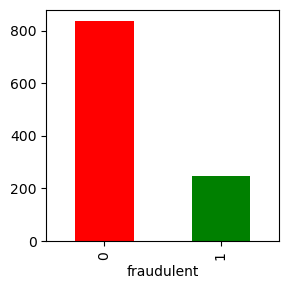

In [26]:
plt.figure(figsize = (3,3))
Cust_data["fraudulent"].value_counts().plot(kind="bar",color=["red","green"])

In [27]:
#So, we can do Undersampling technique to balance the datasets otherwise As you can see, this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class.
df_majority = Cust_data[Cust_data.fraudulent == 0]
df_minority = Cust_data[Cust_data.fraudulent == 1]

In [28]:
#random_state it's won't shuffle if we run this multiple time 
df_majority_undersample = df_majority.sample(replace = False, n = 247, random_state = 123)

In [29]:
balanced_sample = pd.concat([df_majority_undersample, df_minority])
print(balanced_sample.fraudulent.value_counts())
balanced_sample.shape

fraudulent
0    247
1    247
Name: count, dtype: int64


(494, 16)

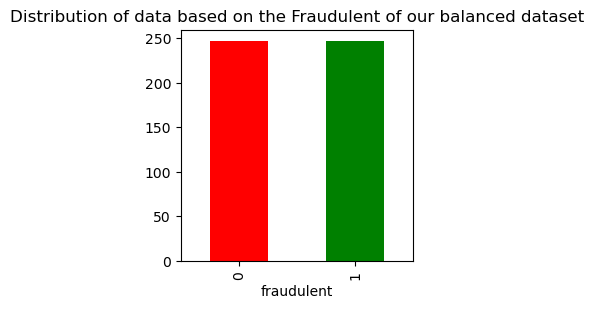

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (3,3))
balanced_sample.fraudulent.value_counts().plot(kind='bar', color= ['red','green'])
plt.title('Distribution of data based on the Fraudulent of our balanced dataset')
plt.show()

### Performing the Exploratory Data Analysis on the Balanced data

In [31]:
#checking the null values 
balanced_sample.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [32]:
#checking the duplicate values 
balanced_sample.duplicated().sum()

0

In [33]:
#checking our statistical data 
balanced_sample.describe()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
count,4.940000e+02,494.000000,494,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,5.191809e+07,0.544534,2015-11-18 13:59:30.850202368,23.894737,522.880567,0.979757,4.803524e+07,5.191809e+07,2.295547,46.603239,0.111336,0.512146,1.483806,11176.002024,1.522267,0.500000
min,1.545570e+05,0.000000,1974-02-28 00:00:00,0.000000,0.000000,0.000000,7.006800e+04,1.545570e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000
25%,2.917879e+07,0.000000,1984-07-15 00:00:00,10.000000,269.250000,0.000000,2.354548e+07,2.917879e+07,1.000000,21.250000,0.000000,0.000000,1.000000,1630.000000,1.000000,0.000000
50%,5.017549e+07,1.000000,1994-05-31 00:00:00,24.000000,515.500000,1.000000,4.630261e+07,5.017549e+07,2.000000,45.000000,0.000000,0.000000,2.000000,2553.000000,1.000000,0.500000
75%,7.770941e+07,1.000000,2064-06-03 18:00:00,37.000000,786.750000,2.000000,7.370107e+07,7.770941e+07,3.000000,72.000000,0.000000,1.000000,2.000000,20617.500000,2.000000,1.000000
max,9.989200e+07,1.000000,2073-11-30 00:00:00,49.000000,1077.000000,2.000000,9.977548e+07,9.989200e+07,4.000000,99.000000,1.000000,2.000000,2.000000,48150.500000,3.500000,1.000000
std,2.854071e+07,0.498518,NaN,14.636261,308.550251,0.815416,2.925185e+07,2.854071e+07,1.295060,29.016336,0.314867,0.679200,0.739182,13852.129024,0.902729,0.500507


### Split the Data into Train & Test

In [34]:
#Dividing the data into traing and testing data 
from sklearn.model_selection import train_test_split, GridSearchCV

db =['fraudulent','DateOfBirth']
x=balanced_sample.drop(db,axis=1)
y=balanced_sample['fraudulent']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
x_train.shape

(395, 14)

In [36]:
x_test.shape

(99, 14)

### Building Different Machine Learning Models

1. Logistic Regression Algorithm

In [37]:
#importing necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [38]:
model = LogisticRegression()

In [39]:
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
train_pred_logi=model.predict(x_train)

In [41]:
LogisticRegression_Train_Accuracy = accuracy_score(train_pred_logi,y_train)

In [42]:
print(LogisticRegression_Train_Accuracy)

0.5113924050632911


In [43]:
#printing classification report for Train Dataset
print(classification_report(train_pred_logi,y_train))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57       257
           1       0.36      0.52      0.43       138

    accuracy                           0.51       395
   macro avg       0.51      0.51      0.50       395
weighted avg       0.56      0.51      0.52       395



In [44]:
test_pred_logi = model.predict(x_test)

In [45]:
LogisticRegression_Test_Accuracy = accuracy_score(test_pred_logi,y_test)

In [46]:
print(LogisticRegression_Test_Accuracy)

0.45454545454545453


In [47]:
#printing classification report for Test Dataset
print(classification_report(test_pred_logi,y_test))

              precision    recall  f1-score   support

           0       0.61      0.48      0.53        65
           1       0.29      0.41      0.34        34

    accuracy                           0.45        99
   macro avg       0.45      0.44      0.44        99
weighted avg       0.50      0.45      0.47        99



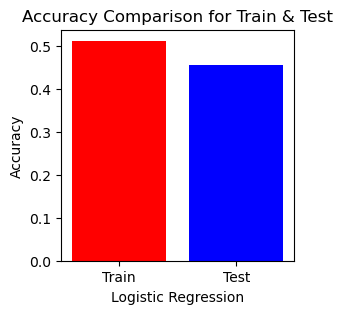

In [48]:
#creating list for train test accuracy
train_test = ['Train','Test']
aucc = [LogisticRegression_Train_Accuracy,LogisticRegression_Test_Accuracy] 
plt.figure(figsize=(3, 3))
# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])
#Add Labels and title 
plt.xlabel('Logistic Regression')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')
#Show the plot
plt.show()

2. Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [50]:
ds=DecisionTreeClassifier(max_depth=3)

In [51]:
ds.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
train_pred=ds.predict(x_train)

In [53]:
DecisionTreeClassifier_Train_Accuracy = accuracy_score(train_pred,y_train)

In [54]:
print(DecisionTreeClassifier_Train_Accuracy)

0.6050632911392405


In [55]:
test_pred=ds.predict(x_test)

In [56]:
DecisionTreeClassifier_Test_Accuracy = accuracy_score(test_pred,y_test)

In [57]:
print(DecisionTreeClassifier_Test_Accuracy)

0.5858585858585859


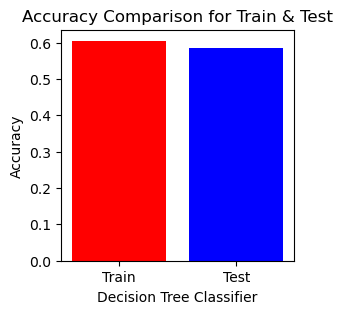

In [58]:
#creating list for train test accuracy

train_test = ['Train','Test']
aucc = [DecisionTreeClassifier_Train_Accuracy,DecisionTreeClassifier_Test_Accuracy] 
plt.figure(figsize=(3, 3))

# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])

#Add Labels and title 
plt.xlabel('Decision Tree Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')

#Show the plot
plt.show()

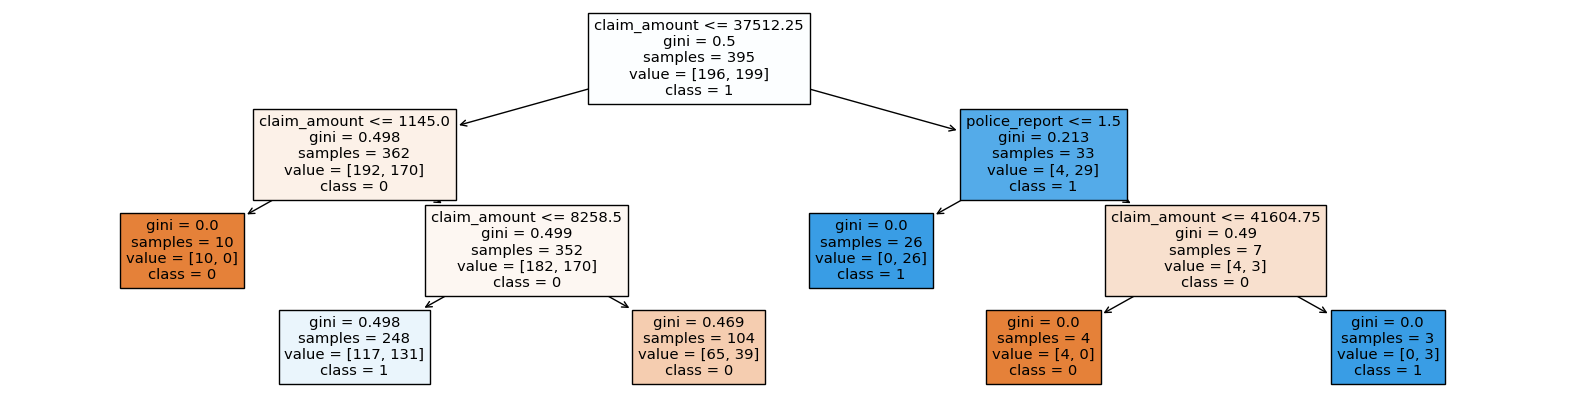

In [59]:
#building model using  decision trees classifier 
import matplotlib.pyplot as plt
from  sklearn.tree import plot_tree
plt.figure(figsize=(20,5))
plot_tree(ds,feature_names=x.columns.tolist(),class_names=["0","1"],filled=True)
plt.show()

3. Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfr=RandomForestClassifier(n_estimators=9,max_depth=5,random_state=42)

In [62]:
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=9, random_state=42)

In [63]:
train_pred_rf=rfr.predict(x_train)

In [64]:
RandomForestClassifier_Train_Accuracy = accuracy_score(train_pred_rf,y_train)

In [65]:
print(RandomForestClassifier_Train_Accuracy)

0.7772151898734178


In [66]:
test_pred_rf=rfr.predict(x_test)

In [67]:
RandomForestClassifier_Test_Accuracy = accuracy_score(test_pred_rf,y_test)

In [68]:
print(RandomForestClassifier_Test_Accuracy)

0.48484848484848486


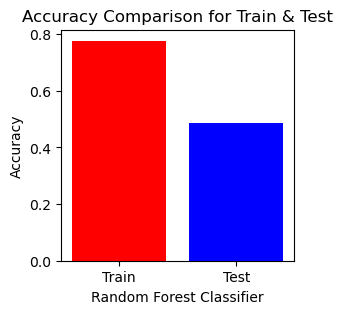

In [69]:
#creating list for train test accuracy
train_test = ['Train','Test']
aucc = [RandomForestClassifier_Train_Accuracy,RandomForestClassifier_Test_Accuracy] 
plt.figure(figsize=(3, 3))
# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])
#Add Labels and title 
plt.xlabel('Random Forest Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')
#Show the plot
plt.show()

4. K-Neighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [74]:
# Fit the model to your training data
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [75]:
# Predict labels for test data
test_pred_knn = knn_model.predict(x_test_scaled)

In [76]:
train_pred_knn = knn_model.predict(x_train_scaled)

In [77]:
KNeighborsClassifier_Train_Accuracy=accuracy_score(train_pred_knn,y_train)

In [78]:
print(KNeighborsClassifier_Train_Accuracy)

0.6683544303797468


In [79]:
KNeighborsClassifier_Test_Accuracy = accuracy_score(test_pred_knn,y_test)

In [80]:
print(KNeighborsClassifier_Test_Accuracy)

0.5252525252525253


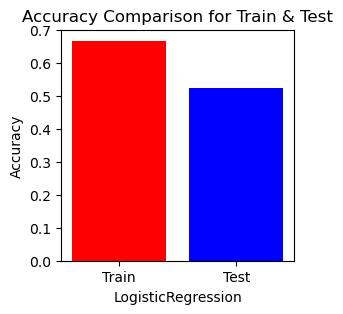

In [81]:
#creating list for train test accuracy
train_test = ['Train','Test']
aucc = [KNeighborsClassifier_Train_Accuracy,KNeighborsClassifier_Test_Accuracy] 
plt.figure(figsize=(3, 3))
# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])
#Add Labels and title 
plt.xlabel('LogisticRegression')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')
#Show the plot
plt.show()

5.Naive Bayes Algorithm

In [82]:
#Importing necessary library 
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb = GaussianNB()

In [84]:
# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [85]:
y_train_pred = gnb.predict(x_train)

In [86]:
y_train_pred = pd.Series(y_train_pred)

In [87]:
Model_data_train = pd.DataFrame(y_train)

In [88]:
Model_data_train

,fraudulent
842,1
186,0
453,1
539,0
522,1
...,...
471,0
105,1
444,1
832,1


In [89]:
Model_data_train.shape

(395, 1)

In [90]:
Model_data_train['y_pred'] = y_train_pred

In [91]:
pd.crosstab(Model_data_train.fraudulent,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
fraudulent,,,
0,60,23,83
1,52,19,71
All,112,42,154


In [92]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[149  47]
 [137  62]]

True Positives(TP) =  149

True Negatives(TN) =  62

False Positives(FP) =  47

False Negatives(FN) =  137


(2, 2)

<Axes: >

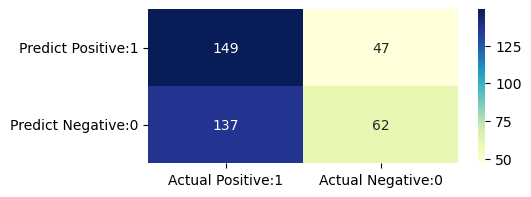

In [93]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(5, 2))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [94]:
GaussianNB_Train_Accuracy = accuracy_score(y_train,y_train_pred)

In [95]:
print(GaussianNB_Train_Accuracy)

0.5341772151898734


In [96]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.52      0.76      0.62       196
           1       0.57      0.31      0.40       199

    accuracy                           0.53       395
   macro avg       0.54      0.54      0.51       395
weighted avg       0.55      0.53      0.51       395



In [97]:
print('model accuracy-->{0:0.3f}'.format(accuracy_score(y_train,y_train_pred)))

model accuracy-->0.534


In [98]:
# Data validation on x_test
test_pred_naive=gnb.predict(x_test)

In [99]:
# Data validation on x_test
test_pred_naive=gnb.predict(x_test)

### Accuracy Plot of all the Models

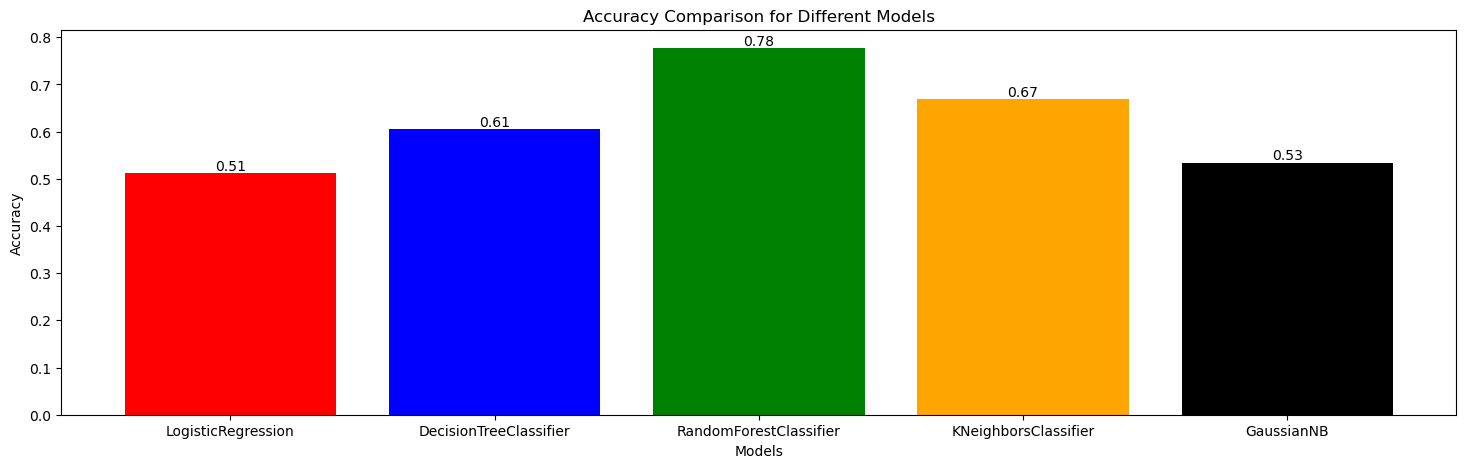

In [100]:
#Create a bar graph for knn, decision tree, random forest, and logistic regression
models = ['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB',] 
accuracy_values = [LogisticRegression_Train_Accuracy, DecisionTreeClassifier_Train_Accuracy,RandomForestClassifier_Train_Accuracy, KNeighborsClassifier_Train_Accuracy, GaussianNB_Train_Accuracy] 
plt.figure(figsize=(18, 5))
# # Plot the bar graph
bars = plt.bar (models, accuracy_values, color=['red', 'blue', 'green', 'orange','black'])
#Add accuracy values on top of each bar
plt.bar_label(bars, labels=[f"{acc:.2f}" for acc in accuracy_values])
#Add Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
#Show the plot
plt.show()

### OverSampling

In [101]:
#random_state it's won't shuffle if we run this multiple time 
df_minority_oversample = df_minority.sample(replace = True, n = 838, random_state = 123)

In [102]:
balanced_sample = pd.concat([df_minority_oversample, df_majority])
print(balanced_sample.fraudulent.value_counts())
balanced_sample.shape

fraudulent
1    838
0    838
Name: count, dtype: int64


(1676, 16)

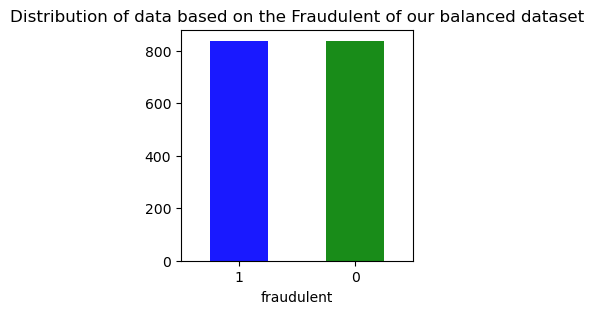

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (3,3))
balanced_sample.fraudulent.value_counts().plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Fraudulent of our balanced dataset')
plt.show()

In [104]:
#checking the null values 
balanced_sample.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [105]:
#checking the duplicate values 
balanced_sample.duplicated().sum()

599

In [106]:
#checking our statistical data 
balanced_sample.describe()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
count,1.676000e+03,1676.000000,1676,1676.000000,1676.000000,1676.000000,1.676000e+03,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,5.110194e+07,0.498210,2016-01-14 08:03:43.389021184,23.842482,531.777446,0.971957,4.835139e+07,5.110194e+07,2.308473,48.052506,0.098449,0.525656,1.464200,12196.652446,1.544749,0.500000
min,1.545570e+05,0.000000,1974-02-14 00:00:00,0.000000,0.000000,0.000000,2.683200e+04,1.545570e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000
25%,2.799440e+07,0.000000,1984-06-03 00:00:00,11.000000,261.750000,0.000000,2.216973e+07,2.799440e+07,1.000000,22.000000,0.000000,0.000000,1.000000,1737.500000,1.000000,0.000000
50%,5.049561e+07,0.000000,1994-07-20 12:00:00,23.500000,526.500000,1.000000,4.853933e+07,5.049561e+07,3.000000,47.000000,0.000000,0.000000,2.000000,2669.000000,1.000000,0.500000
75%,7.727389e+07,1.000000,2064-05-12 00:00:00,37.000000,803.000000,2.000000,7.416587e+07,7.727389e+07,3.000000,74.000000,0.000000,1.000000,2.000000,23945.000000,2.000000,1.000000
max,9.996199e+07,1.000000,2073-11-30 00:00:00,49.000000,1077.000000,2.000000,9.977548e+07,9.996199e+07,4.000000,99.000000,1.000000,2.000000,2.000000,48150.500000,3.500000,1.000000
std,2.869740e+07,0.500146,NaN,14.645674,313.107682,0.816868,2.949474e+07,2.869740e+07,1.333723,29.403984,0.298009,0.702191,0.746275,14515.722259,0.920786,0.500149


### Split the Data into Train & Test

In [107]:
#Dividing the data into traing and testing data 
from sklearn.model_selection import train_test_split, GridSearchCV

db =['fraudulent','DateOfBirth']
x=balanced_sample.drop(db,axis=1)
y=balanced_sample['fraudulent']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [108]:
x_train.shape

(1340, 14)

In [109]:
x_test.shape

(336, 14)

### Building Different Models

1. Logistic regression model

In [110]:
#importing necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [111]:
model = LogisticRegression()

In [112]:
model.fit(x_train, y_train)

LogisticRegression()

In [113]:
train_pred_logi=model.predict(x_train)

In [114]:
LogisticRegression_Train_Accuracy1 = accuracy_score(train_pred_logi,y_train)

In [115]:
print(LogisticRegression_Train_Accuracy1)

0.5380597014925373


In [116]:
#printing classification report for Train Dataset
print(classification_report(train_pred_logi,y_train))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       760
           1       0.47      0.54      0.50       580

    accuracy                           0.54      1340
   macro avg       0.54      0.54      0.54      1340
weighted avg       0.55      0.54      0.54      1340



In [117]:
test_pred_logi = model.predict(x_test)

In [118]:
LogisticRegression_Test_Accuracy1 = accuracy_score(test_pred_logi,y_test)

In [119]:
print(LogisticRegression_Test_Accuracy1)

0.5119047619047619


In [120]:
#printing classification report for Test Dataset
print(classification_report(test_pred_logi,y_test))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       179
           1       0.48      0.54      0.51       157

    accuracy                           0.51       336
   macro avg       0.51      0.51      0.51       336
weighted avg       0.52      0.51      0.51       336



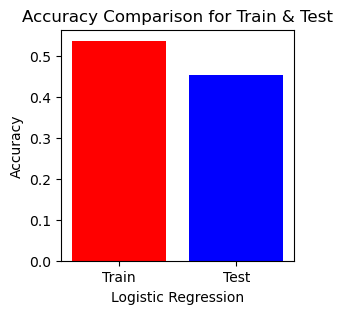

In [121]:
#creating list for train test accuracy
train_test = ['Train','Test']
aucc = [LogisticRegression_Train_Accuracy1,LogisticRegression_Test_Accuracy] 
plt.figure(figsize=(3, 3))
# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])
#Add Labels and title 
plt.xlabel('Logistic Regression')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')
#Show the plot
plt.show()

2. Decision Tree Classifier

In [122]:
ds=DecisionTreeClassifier(max_depth=3)

In [123]:
ds.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [124]:
train_pred=ds.predict(x_train)

In [125]:
DecisionTreeClassifier_Train_Accuracy1 = accuracy_score(train_pred,y_train)

In [126]:
print(DecisionTreeClassifier_Train_Accuracy1)

0.5850746268656717


In [127]:
test_pred=ds.predict(x_test)

In [128]:
DecisionTreeClassifier_Test_Accuracy1 = accuracy_score(test_pred,y_test)

In [129]:
print(DecisionTreeClassifier_Test_Accuracy1)

0.5714285714285714


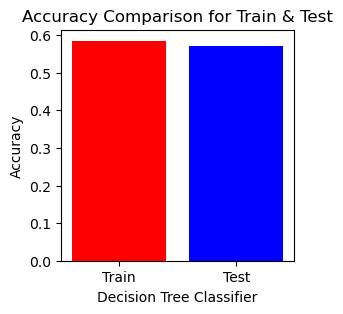

In [130]:
#creating list for train test accuracy

train_test = ['Train','Test']
aucc = [DecisionTreeClassifier_Train_Accuracy1,DecisionTreeClassifier_Test_Accuracy1] 
plt.figure(figsize=(3, 3))

# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])

#Add Labels and title 
plt.xlabel('Decision Tree Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')

#Show the plot
plt.show()

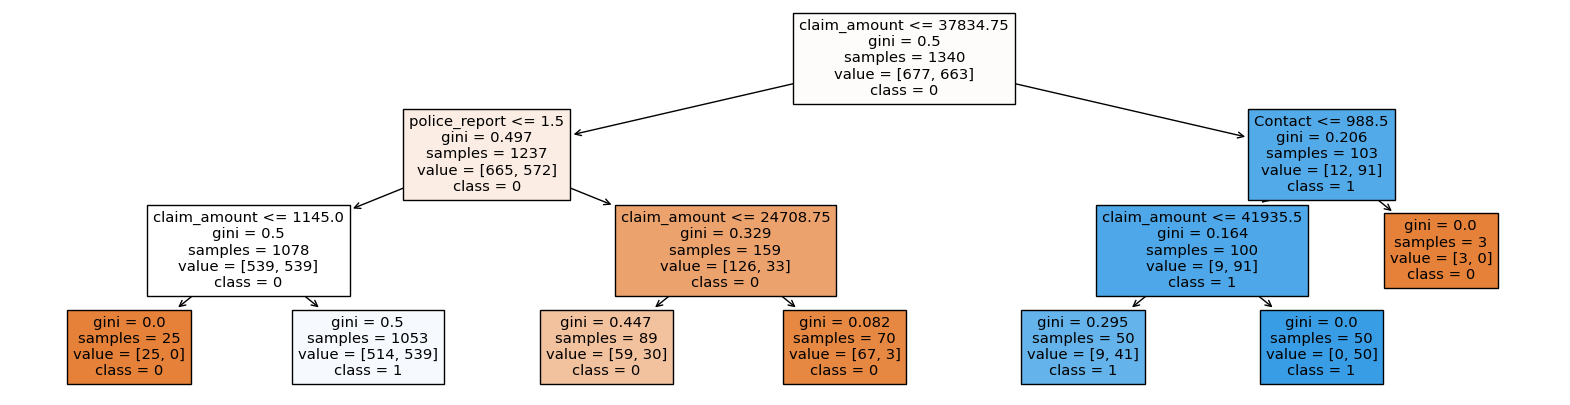

In [131]:
#building model using  decision trees classifier 
import matplotlib.pyplot as plt
from  sklearn.tree import plot_tree
plt.figure(figsize=(20,5))
plot_tree(ds,feature_names=x.columns.tolist(),class_names=["0","1"],filled=True)
plt.show()

3. Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfr=RandomForestClassifier(n_estimators=9,max_depth=5,random_state=42)

In [134]:
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=9, random_state=42)

In [135]:
train_pred_rf=rfr.predict(x_train)

In [136]:
RandomForestClassifier_Train_Accuracy1 = accuracy_score(train_pred_rf,y_train)

In [137]:
print(RandomForestClassifier_Train_Accuracy1)

0.7671641791044777


In [138]:
test_pred_rf=rfr.predict(x_test)

In [139]:
RandomForestClassifier_Test_Accuracy1 = accuracy_score(test_pred_rf,y_test)

In [140]:
print(RandomForestClassifier_Test_Accuracy1)

0.6785714285714286


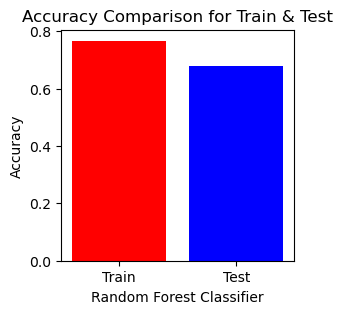

In [141]:
#creating list for train test accuracy
train_test = ['Train','Test']
aucc = [RandomForestClassifier_Train_Accuracy1,RandomForestClassifier_Test_Accuracy1] 
plt.figure(figsize=(3, 3))
# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])
#Add Labels and title 
plt.xlabel('Random Forest Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')
#Show the plot
plt.show()

4. K-Neighbors Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()

In [144]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [145]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [146]:
# Fit the model to your training data
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [147]:
# Predict labels for test data
test_pred_knn = knn_model.predict(x_test_scaled)

In [148]:
train_pred_knn = knn_model.predict(x_train_scaled)

In [149]:
KNeighborsClassifier_Train_Accuracy1 = accuracy_score(train_pred_knn,y_train)

In [150]:
print(KNeighborsClassifier_Train_Accuracy1)

0.8097014925373134


In [151]:
KNeighborsClassifier_Test_Accuracy1 = accuracy_score(test_pred_knn,y_test)

In [152]:
print(KNeighborsClassifier_Test_Accuracy1)

0.6636904761904762


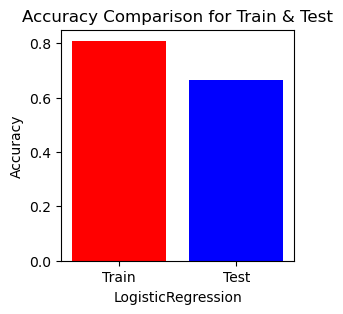

In [153]:
#creating list for train test accuracy
train_test = ['Train','Test']
aucc = [KNeighborsClassifier_Train_Accuracy1,KNeighborsClassifier_Test_Accuracy1] 
plt.figure(figsize=(3, 3))
# Plot the bar graph
bars = plt.bar(train_test, aucc, color=['red', 'blue'])
#Add Labels and title 
plt.xlabel('LogisticRegression')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Train & Test')
#Show the plot
plt.show()

5.Naive Bayes Algorithm

In [154]:
#Importing necessary library 
from sklearn.naive_bayes import GaussianNB

In [155]:
gnb = GaussianNB()

In [156]:
# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [157]:
y_train_pred = gnb.predict(x_train)

In [158]:
y_train_pred = pd.Series(y_train_pred)

In [159]:
Model_data_train = pd.DataFrame(y_train)

In [160]:
Model_data_train

,fraudulent
1046,1
399,1
391,1
966,1
90,0
...,...
377,0
591,0
27,0
803,0


In [161]:
Model_data_train.shape

(1340, 1)

In [162]:
Model_data_train['y_pred'] = y_train_pred

In [163]:
pd.crosstab(Model_data_train.fraudulent,Model_data_train.y_pred, margins = True)

y_pred,0,1,All
fraudulent,,,
0,440,237,677
1,434,229,663
All,874,466,1340


In [164]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[450 227]
 [406 257]]

True Positives(TP) =  450

True Negatives(TN) =  257

False Positives(FP) =  227

False Negatives(FN) =  406


(2, 2)

<Axes: >

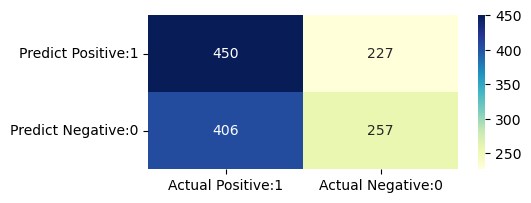

In [165]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(5, 2))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [166]:
GaussianNB_Train_Accuracy1 = accuracy_score(y_train,y_train_pred)

In [167]:
print(GaussianNB_Train_Accuracy1)

0.5276119402985074


In [168]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.53      0.66      0.59       677
           1       0.53      0.39      0.45       663

    accuracy                           0.53      1340
   macro avg       0.53      0.53      0.52      1340
weighted avg       0.53      0.53      0.52      1340



In [169]:
print('model accuracy-->{0:0.3f}'.format(accuracy_score(y_train,y_train_pred)))

model accuracy-->0.528


In [170]:
# Data validation on x_test
test_pred_naive=gnb.predict(x_test)

In [171]:
# Data validation on x_test
test_pred_naive=gnb.predict(x_test)

### Accuracy Plot of all the Models

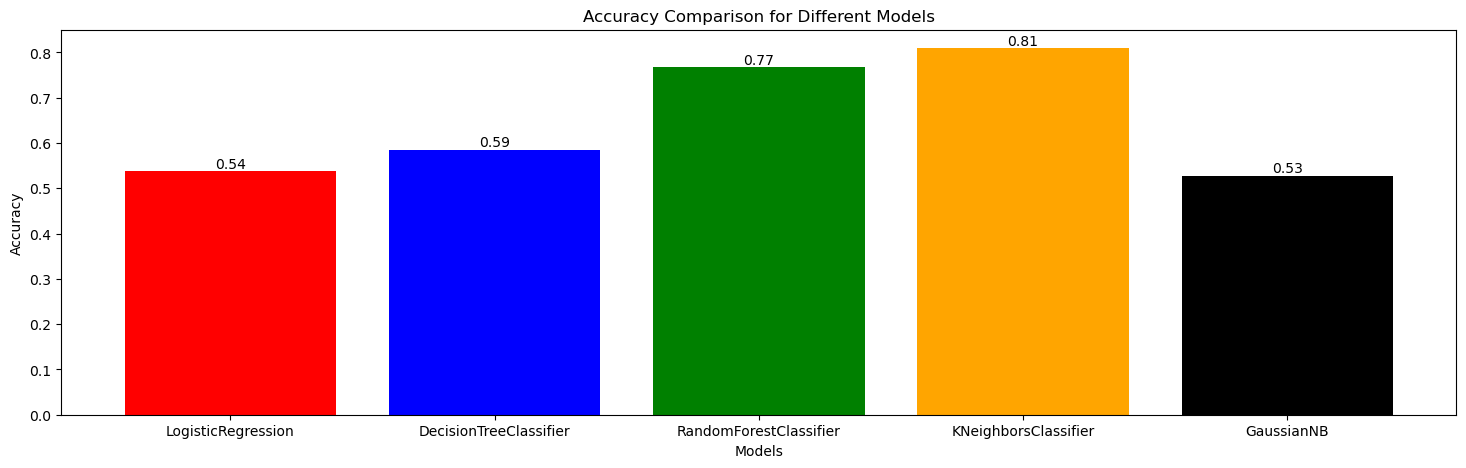

In [172]:
#Create a bar graph for knn, decision tree, random forest, and logistic regression
models = ['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB',] 
accuracy_values = [LogisticRegression_Train_Accuracy1, DecisionTreeClassifier_Train_Accuracy1,RandomForestClassifier_Train_Accuracy1, KNeighborsClassifier_Train_Accuracy1, GaussianNB_Train_Accuracy1] 
plt.figure(figsize=(18, 5))
# # Plot the bar graph
bars = plt.bar (models, accuracy_values, color=['red', 'blue', 'green', 'orange','black'])
#Add accuracy values on top of each bar
plt.bar_label(bars, labels=[f"{acc:.2f}" for acc in accuracy_values])
#Add Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
#Show the plot
plt.show()